# **Load Librarry**

In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# **Load Dataset**

In [ ]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_FE/CFeaturesEngineering_Nm.csv'

In [ ]:
# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

# **Fitur Selection**

## **Features Selecting Absolute Correlation and Heatmap**

In [ ]:
# Ambil semua nama kolom
all_columns = df_main.columns.tolist()

# Hapus 'nama_industri_encoded' dari daftar nama kolom
selected_columns = [col for col in all_columns if col != 'nama_industri_encoded']


In [ ]:
def calculate_abs_corr(df, features, target):
    abs_corr_dict = {}
    for feature in features:
        abs_corr_dict[feature] = abs(df[feature].corr(df[target]))
    return abs_corr_dict
abs_corr_scores = calculate_abs_corr(df_main, selected_columns, 'nama_industri_encoded')

# Mengurutkan nilai absolut koefisien korelasi dari yang terbesar ke yang terkecil
sorted_abs_corr_scores = sorted(abs_corr_scores.items(), key=lambda x: x[1], reverse=True)

# Menampilkan hasil
for feature, abs_corr_score in sorted_abs_corr_scores:
    print(f"Nilai Absolut Korelasi untuk fitur '{feature}': {abs_corr_score}")

Nilai Absolut Korelasi untuk fitur 'tipe_kompensasi_rp': nan
Nilai Absolut Korelasi untuk fitur 'mata_uang_rp': nan
Nilai Absolut Korelasi untuk fitur 'sector_Construction and Engineering': 0.24394886600607957
Nilai Absolut Korelasi untuk fitur 'jumlah_skill_perindustri': 0.24241677073400658
Nilai Absolut Korelasi untuk fitur 'standar_gaji': 0.23209605197051786
Nilai Absolut Korelasi untuk fitur 'sector_Entertainment': 0.2168653573413555
Nilai Absolut Korelasi untuk fitur 'sector_Health and Wellness': 0.1884281953920011
Nilai Absolut Korelasi untuk fitur 'gaji_rata-rata_perbulan': 0.17017357970023986
Nilai Absolut Korelasi untuk fitur 'sector_Energy and Natural Resources': 0.16542789651487513
Nilai Absolut Korelasi untuk fitur 'sector_Consumer Services and Retail': 0.16487419230662748
Nilai Absolut Korelasi untuk fitur 'tingkat_pengalaman_terformat_encoded': 0.16148469368622928
Nilai Absolut Korelasi untuk fitur 'sector_Transportation and Logistics': 0.15897791267811856
Nilai Absolut K

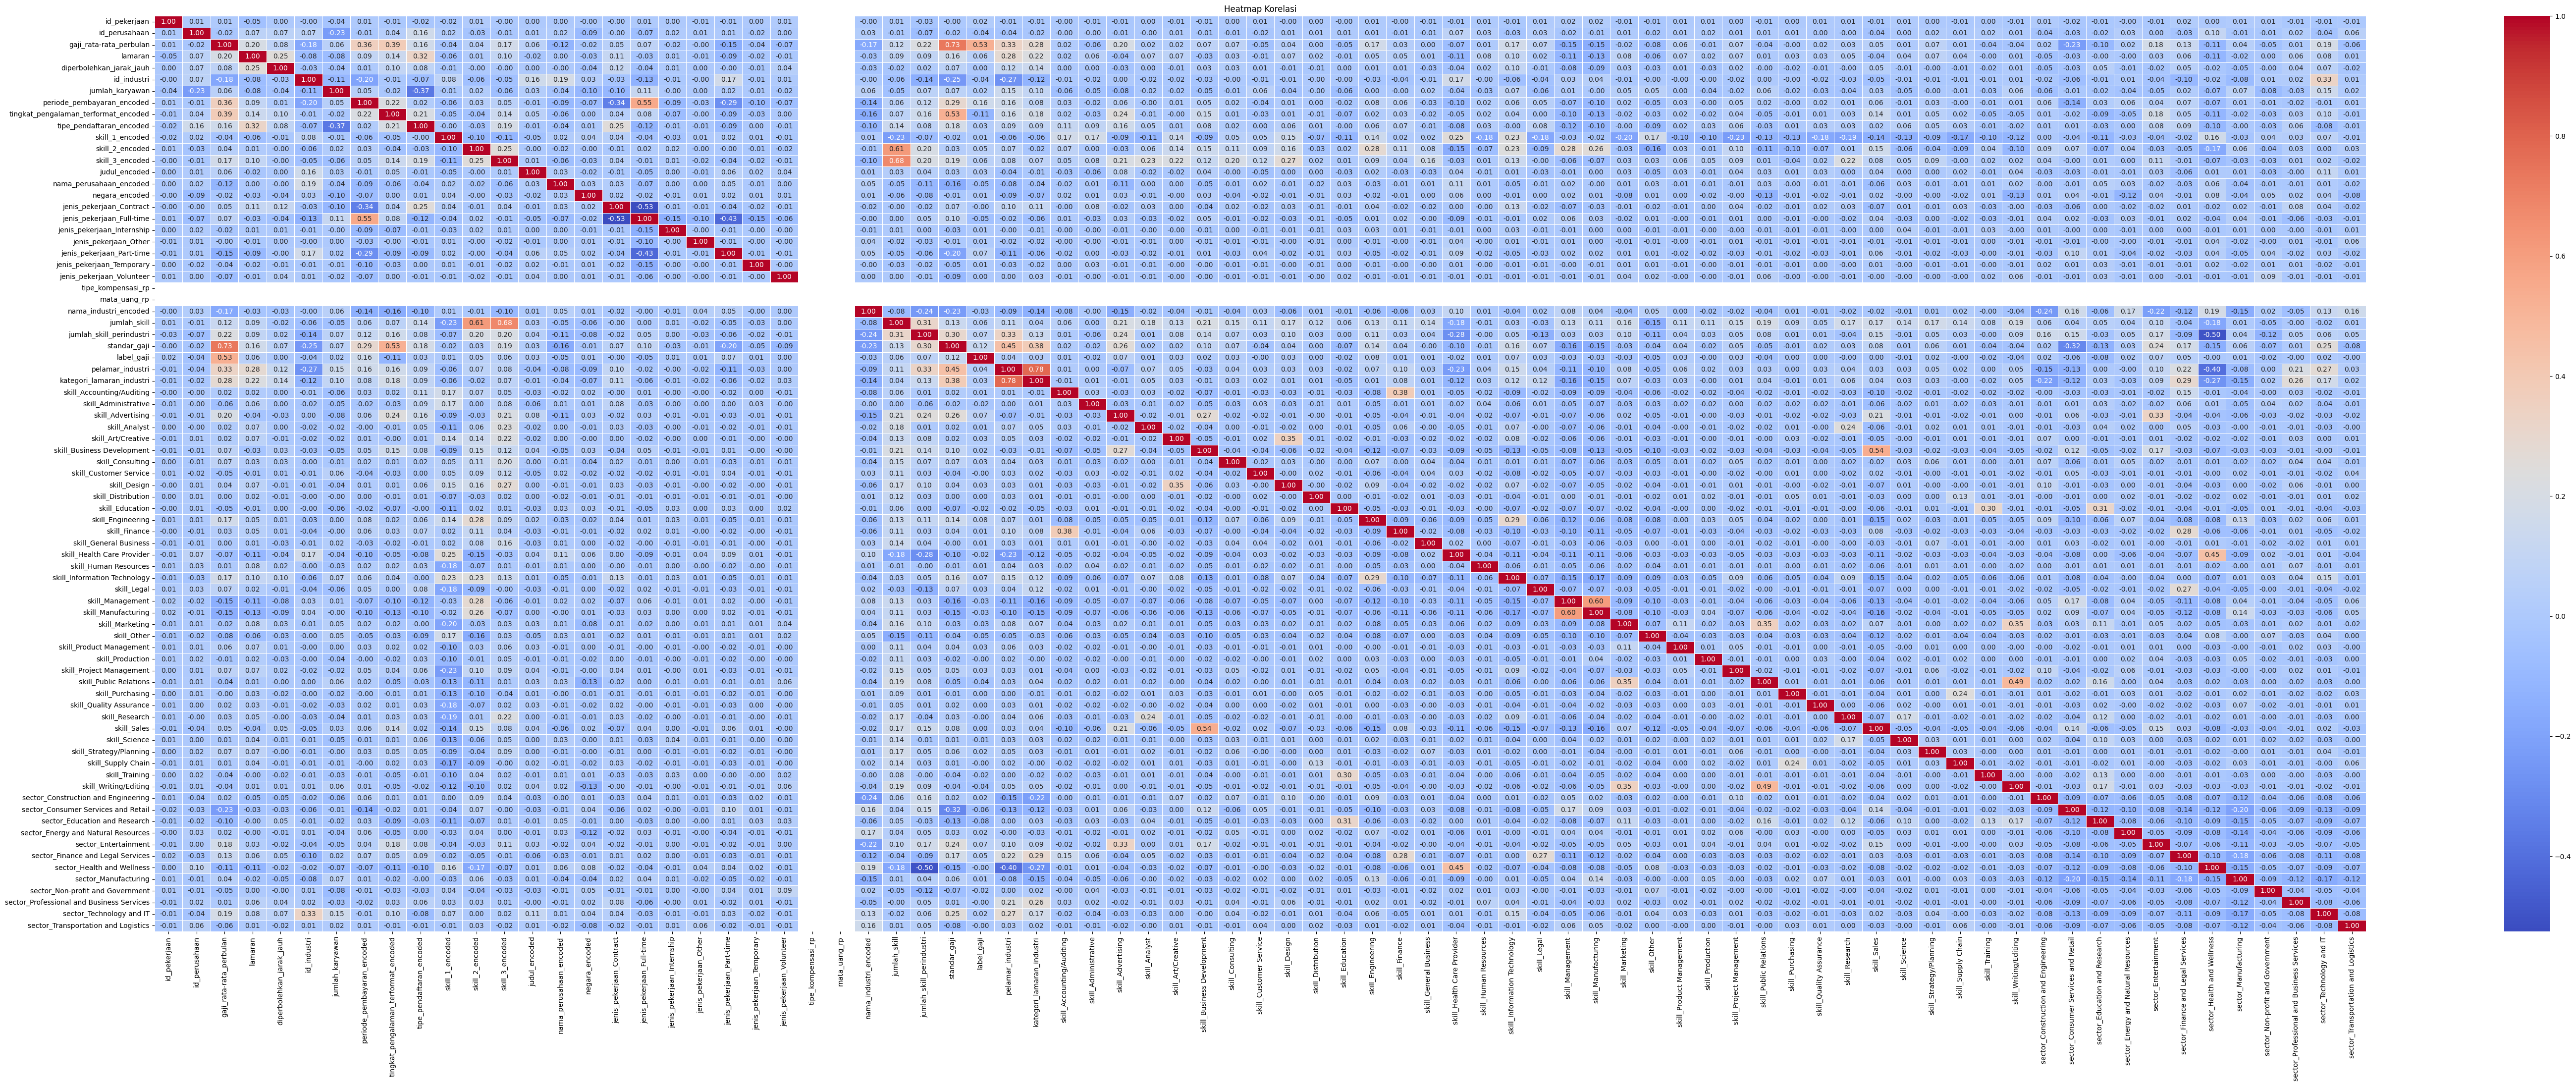

In [ ]:
plt.figure(figsize=(72, 24))
sns.heatmap(df_main.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## **Features Selecting Base Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_main[selected_columns]
y = df_main['nama_industri_encoded']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Lihat feature importances dari Random Forest
print("Feature Importances dari Random Forest:")
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}': {rf.feature_importances_[i]}")

# Bangun model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Lihat feature importances dari Decision Tree
print("\nFeature Importances dari Decision Tree:")
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}': {dt.feature_importances_[i]}")

Feature Importances dari Random Forest:
Feature 'id_pekerjaan': 0.012323736392337145
Feature 'id_perusahaan': 0.025943780300949917
Feature 'gaji_rata-rata_perbulan': 0.0567021438479834
Feature 'lamaran': 0.00594882257707222
Feature 'diperbolehkan_jarak_jauh': 0.0020915114375757975
Feature 'id_industri': 0.1840720719707389
Feature 'jumlah_karyawan': 0.01878164590006769
Feature 'periode_pembayaran_encoded': 0.008372737294553099
Feature 'tingkat_pengalaman_terformat_encoded': 0.012648628072590894
Feature 'tipe_pendaftaran_encoded': 0.004905384681086039
Feature 'skill_1_encoded': 0.011075706957593063
Feature 'skill_2_encoded': 0.00808595458596693
Feature 'skill_3_encoded': 0.005021178778722174
Feature 'judul_encoded': 0.012276426478136964
Feature 'nama_perusahaan_encoded': 0.017158845175304582
Feature 'negara_encoded': 0.004149237834623407
Feature 'jenis_pekerjaan_Contract': 0.0015197914886570089
Feature 'jenis_pekerjaan_Full-time': 0.003002988214838007
Feature 'jenis_pekerjaan_Internship'

## **Features Selecting Information Value**

In [ ]:
def calculate_iv(df, features, target):
    iv_dict = {}

    for feature in features:
        lst = []
        for val in df[feature].unique():
            good = df[(df[feature] == val) & (df[target] == 1)].count()[target]
            bad = df[(df[feature] == val) & (df[target] == 0)].count()[target]

            if good == 0 or bad == 0:
                iv = 0  # Hindari pembagian oleh nol
            else:
                iv = (good / df[target].sum() - bad / (len(df[target]) - df[target].sum())) * np.log(good / df[target].sum() / (bad / (len(df[target]) - df[target].sum())))

            lst.append({
                'Value': val,
                'All': df[df[feature] == val].count()[target],
                'Good': good,
                'Bad': bad,
                'Distribusi Good': good / df[target].sum(),
                'Distribusi Bad': bad / (len(df[target]) - df[target].sum()),
                'IV': iv
            })

        data = pd.DataFrame(lst)
        iv_dict[feature] = data['IV'].sum()

    return iv_dict

# Hitung IV untuk fitur-fitur terpilih
iv_scores = calculate_iv(df_main, selected_columns, 'nama_industri_encoded')

# Tampilkan hasil
for feature, iv_score in iv_scores.items():
    print(f"Informasi Value (IV) untuk fitur '{feature}': {iv_score}")

Informasi Value (IV) untuk fitur 'id_pekerjaan': 0
Informasi Value (IV) untuk fitur 'id_perusahaan': 0
Informasi Value (IV) untuk fitur 'gaji_rata-rata_perbulan': 0
Informasi Value (IV) untuk fitur 'lamaran': 0
Informasi Value (IV) untuk fitur 'diperbolehkan_jarak_jauh': 0
Informasi Value (IV) untuk fitur 'id_industri': 0
Informasi Value (IV) untuk fitur 'jumlah_karyawan': 0
Informasi Value (IV) untuk fitur 'periode_pembayaran_encoded': 0
Informasi Value (IV) untuk fitur 'tingkat_pengalaman_terformat_encoded': 0
Informasi Value (IV) untuk fitur 'tipe_pendaftaran_encoded': 0
Informasi Value (IV) untuk fitur 'skill_1_encoded': 0
Informasi Value (IV) untuk fitur 'skill_2_encoded': 0
Informasi Value (IV) untuk fitur 'skill_3_encoded': 0
Informasi Value (IV) untuk fitur 'judul_encoded': 0
Informasi Value (IV) untuk fitur 'nama_perusahaan_encoded': 0
Informasi Value (IV) untuk fitur 'negara_encoded': 0
Informasi Value (IV) untuk fitur 'jenis_pekerjaan_Contract': 0
Informasi Value (IV) untuk 

## **Select Unseful Features**

In [ ]:
unuseFeatures=['id_industri', 'id_pekerjaan','id_perusahaan','judul_encoded','negara_encoded','nama_perusahaan_encoded','tipe_kompensasi_rp','mata_uang_rp','jumlah_karyawan','lamaran','gaji_rata-rata_perbulan', 'skill_1_encoded', 'skill_2_encoded', 'skill_3_encoded', 'pelamar_industri', 'label_gaji','jumlah_skill']

# **Preparation to Multilabel Classification**

## **One Hot Encoding**

In [ ]:
# Lakukan one-hot encoding pada kolom 'nama_industri_encoded'
encoded = pd.get_dummies(df_main['nama_industri_encoded'], prefix='nama_industri_encoded')

# Gabungkan hasil encoding dengan DataFrame awal
df_combined = pd.concat([df_main, encoded], axis=1)

# Gabungkan baris-baris dengan 'id_pekerjaan' yang sama menggunakan metode max
df_groupby = df_combined.groupby('id_pekerjaan', as_index=False).max()

In [ ]:
# # Gabungkan dengan DataFrame awal menggunakan left join
# df_result = df_main.merge(df_groupby, how='left', on='id_pekerjaan')

## **Drop Unuseful Features**

In [ ]:
df_fix=df_groupby.drop(columns=['nama_industri_encoded'])

In [ ]:
df_modeling=df_fix.drop(columns=unuseFeatures)

In [ ]:
df_modeling

diperbolehkan_jarak_jauh  periode_pembayaran_encoded  \
0                             0                           5   
1                             0                           5   
2                             0                           5   
3                             0                           5   
4                             0                           5   
...                         ...                         ...   
33031                         1                           5   
33032                         0                           2   
33033                         0                           5   
33034                         0                           5   
33035                         0                           4   

       tingkat_pengalaman_terformat_encoded  tipe_pendaftaran_encoded  \
0                                         4                         2   
1                                         4                         3   
2                                         2                         3   
3                                         4                         3   
4                                         4                         3   
...                                     ...                       ...   
33031                                     4                         1   
33032                                     2                         1   
33033                                     4                         1   
33034                                     4                         1   
33035                                     2                         1   

       jenis_pekerjaan_Contract  jenis_pekerjaan_Full-time  \
0                             0                          1   
1                             0                          1   
2                             0                          1   
3                             0                          1   
4                             0                          1   
...                         ...                        ...   
33031                         0                          1   
33032                         0                          1   
33033                         0                          1   
33034                         0                          1   
33035                         0                          1   

       jenis_pekerjaan_Internship  jenis_pekerjaan_Other  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   
...                           ...                    ...   
33031                           0                      0   
33032                           0                      0   
33033                           0                      0   
33034                           0                      0   
33035                           0                      0   

       jenis_pekerjaan_Part-time  jenis_pekerjaan_Temporary  ...  \
0                              0                          0  ...   
1                              0                          0  ...   
2                              0                          0  ...   
3                              0                          0  ...   
4                              0                          0  ...   
...                          ...                        ...  ...   
33031                          0                          0  ...   
33032                          0                          0  ...   
33033                          0                          0  ...   
33034                          0                          0  ...   
33035                          0                          0  ...   

       nama_industri_encoded_66  nama_industri_encoded_67  \
0                         Fal

# **Data Splitting and Scaling**

## **Split Features and Target**

In [ ]:
# Pisahkan fitur dan target
y = df_modeling.filter(like='nama_industri_encoded_')
X = df_modeling.drop(columns=y.columns)

## **Scaling Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Split Data Train and Data Test**

In [ ]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi jumlah kelas
num_classes = len(y_train.columns)

In [ ]:
# Mengubah DataFrame menjadi array numpy
y_train = y_train.to_numpy()

In [ ]:
# Mengubah DataFrame menjadi array numpy
y_test = y_test.to_numpy()

## **Check Label Distribution**

In [ ]:
from collections import Counter

In [ ]:
# Menghitung jumlah total sampel
total_samples = len(y_train)

# Menghitung jumlah sampel untuk setiap kelas
label_counts = np.sum(y, axis=0)

# Menampilkan jumlah sampel untuk setiap kelas
print("Label counts in training data:")
for i, count in enumerate(label_counts):
    class_name = f"Class {i+1}"
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}%)")

Label counts in training data:
Class 1: 531 samples (2.01%)
Class 2: 531 samples (2.01%)
Class 3: 527 samples (1.99%)
Class 4: 531 samples (2.01%)
Class 5: 526 samples (1.99%)
Class 6: 529 samples (2.00%)
Class 7: 525 samples (1.99%)
Class 8: 531 samples (2.01%)
Class 9: 529 samples (2.00%)
Class 10: 514 samples (1.94%)
Class 11: 508 samples (1.92%)
Class 12: 531 samples (2.01%)
Class 13: 517 samples (1.96%)
Class 14: 528 samples (2.00%)
Class 15: 473 samples (1.79%)
Class 16: 522 samples (1.98%)
Class 17: 526 samples (1.99%)
Class 18: 531 samples (2.01%)
Class 19: 518 samples (1.96%)
Class 20: 523 samples (1.98%)
Class 21: 525 samples (1.99%)
Class 22: 445 samples (1.68%)
Class 23: 515 samples (1.95%)
Class 24: 524 samples (1.98%)
Class 25: 525 samples (1.99%)
Class 26: 528 samples (2.00%)
Class 27: 531 samples (2.01%)
Class 28: 529 samples (2.00%)
Class 29: 528 samples (2.00%)
Class 30: 530 samples (2.01%)
Class 31: 531 samples (2.01%)
Class 32: 531 samples (2.01%)
Class 33: 531 samp

# **Modeling**

## **Modeling with Split Data**

In [ ]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test, model_name):
    # Menghitung metrik untuk data pelatihan
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='macro')
    recall_train = recall_score(y_train, y_pred_train, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')

    # Menghitung metrik untuk data pengujian
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    # Membuat dictionary untuk hasil pelatihan
    dataTrain = {
        'Model': [model_name],
        'Accuracy (Train)': ['{:.5f}'.format(accuracy_train)],
        'Precision (Train)': ['{:.5f}'.format(precision_train)],
        'Recall (Train)': ['{:.5f}'.format(recall_train)],
        'F1 Score (Train)': ['{:.5f}'.format(f1_train)],
    }

    # Membuat dictionary untuk hasil pengujian
    dataTest = {
        'Model': [model_name],
        'Accuracy (Test)': ['{:.5f}'.format(accuracy_test)],
        'Precision (Test)': ['{:.5f}'.format(precision_test)],
        'Recall (Test)': ['{:.5f}'.format(recall_test)],
        'F1 Score (Test)': ['{:.5f}'.format(f1_test)]
    }

    # Membuat DataFrame untuk hasil pelatihan dan pengujian
    df_Tr = pd.DataFrame(dataTrain)
    df_Ts = pd.DataFrame(dataTest)
    return df_Tr, df_Ts

### **Random Forest Multilabel Classifier**

In [ ]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Melatih model
rf.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_Trrf = rf.predict(X_train)

# Melakukan prediksi pada data uji
y_pred_Tsrf = rf.predict(X_test)

In [ ]:
dfRf_Tr,dfRf_Ts = evaluate_classification_model(y_train, y_pred_Trrf, y_test, y_pred_Tsrf, 'Random Forest')

In [ ]:
dfRf_Tr

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Random Forest          0.98051           0.99465        0.98675   

  F1 Score (Train)  
0          0.99061

In [ ]:
dfRf_Ts

Model Accuracy (Test) Precision (Test) Recall (Test)  \
0  Random Forest         0.82143          0.95764       0.81857   

  F1 Score (Test)  
0         0.87866

Pada model Random Forest hasil evaluasi menunjukan Accuracy Score sekitar 0.97 pada data training dan sekitar 0.75 pada data testing. Hal ini berarti bahwa model Random Forest mampu menjelaskan 97% variansi dari data training dan 75% variansi dari data testing, menunjukkan kemungkinan terjadinya overfitting pada model. Overfitting terjadi ketika model machine learning belajar terlalu baik pada data training, menangkap detail dan noise yang tidak relevan, sehingga performanya menurun saat dihadapkan pada data baru (data testing).

### **Decision Tree Multilabel Classifier**

In [ ]:
# Inisialisasi Multi-label Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# MultiOutputClassifier membungkus classifier dan menghasilkan model multilabel
mldt_clf = MultiOutputClassifier(dt_clf, n_jobs=-1)

# Melatih model MLRF
mldt_clf.fit(X_train, y_train)

# Prediksi dengan model MLRF pada data latih
y_pred_Trdt = mldt_clf.predict(X_train)

# Prediksi dengan model MLRF pada data uji
y_pred_Tsdt = mldt_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
dfDt_Tr,dfDt_Ts = evaluate_classification_model(y_train, y_pred_Trdt, y_test, y_pred_Tsdt, 'Decision Tree')

In [ ]:
dfDt_Tr

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Decision Tree          0.98021           0.99603        0.98543   

  F1 Score (Train)  
0          0.99060

In [ ]:
dfDt_Ts

Model Accuracy (Test) Precision (Test) Recall (Test)  \
0  Decision Tree         0.87485          0.92167       0.91625   

  F1 Score (Test)  
0         0.91837

Pada model Decision Tree hasil evaluasi menunjukan Accuracy Score sekitar 0.97 pada data training dan sekitar 0.85 pada data testing. Hal ini berarti bahwa model Decision Tree mampu menjelaskan 97% variansi dari data training dan 75% variansi dari data testig. Ini menunjukkan kemungkinan terjadinya overfitting pada model, meskipun perbedaan antara nilai precision, recaal dan F1 score lebih kecil. Tetapi model ini lebih baik dengan model yang sebelumnya.

### **K-Nearest Neighbors Multilabel**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=75)

multioutput_knn = MultiOutputClassifier(knn, n_jobs=-1)

multioutput_knn.fit(X_train, y_train)

y_pred_Trknn = multioutput_knn.predict(X_train)

y_pred_Tsknn = multioutput_knn.predict(X_test)

In [ ]:
dfKnn_Tr,dfKnn_Ts = evaluate_classification_model(y_train, y_pred_Trknn, y_test, y_pred_Tsknn, 'K-Nearest Neighbors')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dfKnn_Tr

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  K-Nearest Neighbors          0.19165           0.66604        0.19550   

  F1 Score (Train)  
0          0.27307

In [ ]:
dfKnn_Ts

Model Accuracy (Test) Precision (Test) Recall (Test)  \
0  K-Nearest Neighbors         0.17721          0.60014       0.18308   

  F1 Score (Test)  
0         0.25518

Pada model K-NN hasil evaluasi menunjukan Accuracy Score sekitar 0.107 pada data training dan sekitar 0.102 pada data testing. Hal ini berarti bahwa model K-NN mampu menjelaskan 10,7% variansi dari data training dan 10,2% variansi dari data testing.  Ini menunjukkan bahwa model mampu menggeneralisasi dengan baik terhadap data yang belum pernah dilihat sebelumnya dan tidak mengalami overfitting atau underfitting dan juga kita bisa lihat pada nilai Precision, recall, dan F1 scorenya perbedaan nilai tidak signifikan. Melihat accurasi yang sangat jelek, model ini kurang cocok untuk diterapkan.

### **Support Vector Machine Multilabel Classifier**

In [ ]:
svc = SVC()

multioutput_svc = MultiOutputClassifier(svc)

multioutput_svc.fit(X_train, y_train)

y_pred_Trsvc = multioutput_svc.predict(X_train)

y_pred_Tssvc = multioutput_svc.predict(X_test)

In [ ]:
dfSvc_Tr,dfSvc_Ts = evaluate_classification_model(y_train, y_pred_Trsvc, y_test, y_pred_Tssvc, 'Support Vector Classifier')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dfSvc_Tr

Model Accuracy (Train) Precision (Train)  \
0  Support Vector Classifier          0.52864           0.87864   

  Recall (Train) F1 Score (Train)  
0        0.56804          0.63410

In [ ]:
dfSvc_Ts

Model Accuracy (Test) Precision (Test) Recall (Test)  \
0  Support Vector Classifier         0.44038          0.82126       0.47821   

  F1 Score (Test)  
0         0.55520

Pada model SVM hasil evaluasi menunjukan Accuracy Score sekitar 0.15 pada data training dan sekitar 0.13 pada data testing. Hal ini berarti bahwa model K-NN mampu menjelaskan 15% variansi dari data training dan 13% variansi dari data testing. Ini menunjukkan bahwa model mampu menggeneralisasi dengan baik terhadap data yang belum pernah dilihat sebelumnya dan tidak mengalami overfitting atau underfitting dan juga kita bisa lihat pada nilai Precision, recall, dan F1 scorenya perbedaan nilai tidak signifikan. Melihat accurasi yang sangat jelek, model ini kurang cocok untuk diterapkan


### **Logistic Regression Multilabel Classifier**

In [ ]:

# Inisialisasi model One-vs-Rest dengan classifier Logistic Regression
lr = OneVsRestClassifier(LogisticRegression())

# Melatih model
lr.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_Trlr = lr.predict(X_train)

# Melakukan prediksi pada data uji
y_pred_Tslr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
dfLr_Tr,dfLr_Ts = evaluate_classification_model(y_train, y_pred_Trlr, y_test, y_pred_Tslr, 'Logistic Regression')

In [ ]:
dfLr_Tr

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Logistic Regression          0.55994           0.78468        0.62840   

  F1 Score (Train)  
0          0.67487

In [ ]:
dfLr_Ts

Model Accuracy (Test) Precision (Test) Recall (Test)  \
0  Logistic Regression         0.52376          0.74668       0.59459   

  F1 Score (Test)  
0         0.63689

### **Gaussian Naive Bayes Multilabel Classifier**

In [ ]:
# Inisialisasi model Naive Bayes dengan multi kelas
nb_model = GaussianNB()

# Membuat MultiOutputClassifier
multi_target_nb = MultiOutputClassifier(nb_model)

# Melatih model
multi_target_nb.fit(X_train, y_train)

# Membuat prediksi pada data latih
y_pred_Trnb = multi_target_nb.predict(X_train)

# Membuat prediksi pada data uji
y_pred_Tsnb = multi_target_nb.predict(X_test)

In [ ]:
dfNb_Tr,dfNb_Ts = evaluate_classification_model(y_train, y_pred_Trnb, y_test, y_pred_Tsnb, 'Naive Bayes')

In [ ]:
dfNb_Tr

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Naive Bayes          0.05195           0.30366        0.97503   

  F1 Score (Train)  
0          0.42342

In [ ]:
dfNb_Ts

Model Accuracy (Test) Precision (Test) Recall (Test) F1 Score (Test)
0  Naive Bayes         0.05039          0.30312       0.96052         0.41935

### **Extreme Gradient Boosting Multilabel Classifier**

In [ ]:
# Bangun Model XGBoost
xgb = XGBClassifier()

# Latih Model
xgb.fit(X_train, y_train)

# Prediksi pada Data Latih
y_pred_TrXGB = xgb.predict(X_train)

# Prediksi pada Data Uji
y_pred_Tsxgb = xgb.predict(X_test)

In [ ]:
dfXGB_Tr,dfXGB_Ts = evaluate_classification_model(y_train, y_pred_TrXGB, y_test, y_pred_Tsxgb, 'XGBoost')

In [ ]:
dfXGB_Tr

Model Accuracy (Train) Precision (Train) Recall (Train) F1 Score (Train)
0  XGBoost          0.96436           0.99379        0.97223          0.98263

In [ ]:
dfXGB_Ts

Model Accuracy (Test) Precision (Test) Recall (Test) F1 Score (Test)
0  XGBoost         0.89952          0.96082       0.91513         0.93653

### **Adaptive Boosting Multilabel Classifier**

In [ ]:
# Inisialisasi Adaboost Classifier
adaboost_clf = AdaBoostClassifier()

# MultiOutputClassifier membungkus Adaboost Classifier untuk memungkinkan multilabel classification
multilabel_adaboost_clf = MultiOutputClassifier(adaboost_clf, n_jobs=-1)

# Melatih model multilabel Adaboost
multilabel_adaboost_clf.fit(X_train, y_train)

# Prediksi dengan model multilabel Adaboost pada data latih
y_pred_Tradb = multilabel_adaboost_clf.predict(X_train)

# Prediksi dengan model multilabel Adaboost pada data uji
y_pred_TSadb = multilabel_adaboost_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
dfADB_Tr,dfADB_Ts = evaluate_classification_model(y_train, y_pred_Tradb, y_test, y_pred_TSadb, 'AdaBoost')

In [ ]:
dfADB_Tr

Model Accuracy (Train) Precision (Train) Recall (Train) F1 Score (Train)
0  AdaBoost          0.85519           0.96284        0.87388          0.91319

In [ ]:
dfADB_Ts

Model Accuracy (Test) Precision (Test) Recall (Test) F1 Score (Test)
0  AdaBoost         0.84065          0.95185       0.85777         0.89877

### **Neural Network Multilabel Classifier**

In [ ]:
# Membangun model neural network
NeuralNet = Sequential()
NeuralNet.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.5))
NeuralNet.add(Dense(128, activation='relu'))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.4))
NeuralNet.add(Dense(64, activation='relu'))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.3))
NeuralNet.add(Dense(32, activation='relu'))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.2))
NeuralNet.add(Dense(y_train.shape[1], activation='sigmoid'))  # Gunakan sigmoid untuk multilabel

# Mengompilasi model dengan learning rate yang disesuaikan
optimizer = Adam(learning_rate=0.001)
NeuralNet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback untuk early stopping dan learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history = NeuralNet.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
661/661 [==============================] - 5s 4ms/step - loss: 0.2634 - accuracy: 0.0325 - val_loss: 0.0770 - val_accuracy: 0.1233 - lr: 0.0010
Epoch 2/50
661/661 [==============================] - 2s 4ms/step - loss: 0.0764 - accuracy: 0.1062 - val_loss: 0.0625 - val_accuracy: 0.2295 - lr: 0.0010
Epoch 3/50
661/661 [==============================] - 2s 4ms/step - loss: 0.0644 - accuracy: 0.1948 - val_loss: 0.0496 - val_accuracy: 0.3617 - lr: 0.0010
Epoch 4/50
661/661 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.2779 - val_loss: 0.0419 - val_accuracy: 0.4478 - lr: 0.0010
Epoch 5/50
661/661 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.3387 - val_loss: 0.0373 - val_accuracy: 0.5057 - lr: 0.0010
Epoch 6/50
661/661 [==============================] - 3s 4ms/step - loss: 0.0454 - accuracy: 0.3870 - val_loss: 0.0342 - val_accuracy: 0.5087 - lr: 0.0010
Epoch 7/50
661/661 [==============================] - 3s 4ms/step - lo

In [ ]:
# Prediksi
y_pred_TrNN = NeuralNet.predict(X_train)
y_pred_binary_TrNN = np.round(y_pred_TrNN)

826/826 [==============================] - 1s 1ms/step


In [ ]:
# Prediksi pada data uji
y_pred_TsNN = NeuralNet.predict(X_test)
y_pred_binary_TsNN = np.round(y_pred_TsNN)

207/207 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import hamming_loss, jaccard_score

# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score pada data latih
print("Hamming Loss Train:", hamming_loss(y_train, y_pred_binary_TrNN))
print("Jaccard Similarity Score Train:", jaccard_score(y_train, y_pred_binary_TrNN, average='micro'))

# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score pada data uji
print("Hamming Loss Test:", hamming_loss(y_test, y_pred_binary_TsNN))
print("Jaccard Similarity Score Test:", jaccard_score(y_test, y_pred_binary_TsNN, average='micro'))

Hamming Loss Train: 0.007481459058574239
Jaccard Similarity Score Train: 0.5705597868581854
Hamming Loss Test: 0.007734059725585149
Jaccard Similarity Score Test: 0.5576457010963647


In [ ]:
dfNn_Tr,dfNn_Ts = evaluate_classification_model(y_train, y_pred_binary_TrNN, y_test, y_pred_binary_TsNN, 'Neural Network')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dfNn_Tr

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Neural Network          0.58487           0.76020        0.63128   

  F1 Score (Train)  
0          0.65413

In [ ]:
dfNn_Ts

Model Accuracy (Test) Precision (Test) Recall (Test)  \
0  Neural Network         0.57461          0.76593       0.62103   

  F1 Score (Test)  
0         0.64604

## **Modeling with Cross Validation**

In [ ]:
def cross_validation_classification(estimator, X, y, cv, model_name):
    # Definisikan scoring untuk evaluasi
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }

    # Melakukan cross-validation dan mendapatkan hasil
    results = cross_validate(estimator, X, y, cv=cv, scoring=scoring, return_train_score=True)

    # Menghitung rata-rata metrik untuk data pelatihan
    train_accuracy_mean = np.mean(results['train_accuracy'])
    train_precision_mean = np.mean(results['train_precision'])
    train_recall_mean = np.mean(results['train_recall'])
    train_f1_mean = np.mean(results['train_f1'])

    # Menghitung rata-rata metrik untuk data validasi (cross-validation)
    val_accuracy_mean = np.mean(results['test_accuracy'])
    val_precision_mean = np.mean(results['test_precision'])
    val_recall_mean = np.mean(results['test_recall'])
    val_f1_mean = np.mean(results['test_f1'])

    # Membuat dictionary untuk hasil pelatihan
    dataTraincv = {
        'Model': [model_name],
        'Accuracy (Train)': ['{:.5f}'.format(train_accuracy_mean)],
        'Precision (Train)': ['{:.5f}'.format(train_precision_mean)],
        'Recall (Train)': ['{:.5f}'.format(train_recall_mean)],
        'F1 Score (Train)': ['{:.5f}'.format(train_f1_mean)],
    }

    # Membuat dictionary untuk hasil validasi (cross-validation)
    dataValcv = {
        'Model': [model_name],
        'Accuracy (Val)': ['{:.5f}'.format(val_accuracy_mean)],
        'Precision (Val)': ['{:.5f}'.format(val_precision_mean)],
        'Recall (Val)': ['{:.5f}'.format(val_recall_mean)],
        'F1 Score (Val)': ['{:.5f}'.format(val_f1_mean)]
    }

    # Membuat DataFrame untuk hasil pelatihan dan validasi (cross-validation)
    df_Trcv = pd.DataFrame(dataTraincv)
    df_Valcv = pd.DataFrame(dataValcv)

    return df_Trcv, df_Valcv

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### **Random Forest Multilabel Classifier**

In [ ]:
dfRf_Trcv, dfRf_Valcv = cross_validation_classification(rf, X, y, kfold, 'Random Forest')

In [ ]:
dfRf_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Random Forest          0.97994           0.99464        0.98651   

  F1 Score (Train)  
0          0.99048

In [ ]:
dfRf_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val) F1 Score (Val)
0  Random Forest        0.83309         0.95947      0.82849        0.88562

### **Decision Tree Multilabel Classifier**

In [ ]:
dfDt_Trcv, dfDt_Valcv = cross_validation_classification(mldt_clf, X, y, kfold, 'Decision Tree')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
dfDt_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Decision Tree          0.97977           0.99588        0.98530   

  F1 Score (Train)  
0          0.99047

In [ ]:
dfDt_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val) F1 Score (Val)
0  Decision Tree        0.88210         0.92108      0.91858        0.91895

### **K-Nearest Neighbors Multilabel**

In [ ]:
dfKnn_Trcv, dfKnn_Valcv = cross_validation_classification(multioutput_knn, X, y, kfold, 'K-Nearest Neighbors')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
dfKnn_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  K-Nearest Neighbors          0.21208           0.69055        0.21490   

  F1 Score (Train)  
0          0.30005

In [ ]:
dfKnn_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val)  \
0  K-Nearest Neighbors        0.20535         0.65390      0.20876   

  F1 Score (Val)  
0        0.28990

### **Support Vector Machine Multilabel Classifier**

In [ ]:
dfSvc_Trcv, dfSvc_Valcv = cross_validation_classification(multioutput_svc, X, y, kfold, 'Support Vector Classifier')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
dfSvc_Trcv

Model Accuracy (Train) Precision (Train)  \
0  Support Vector Classifier          0.53554           0.90718   

  Recall (Train) F1 Score (Train)  
0        0.57719          0.64325

In [ ]:
dfSvc_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val)  \
0  Support Vector Classifier        0.46086         0.81714      0.49612   

  F1 Score (Val)  
0        0.56723

### **Logistic Regression Multilabel Classifier**

In [ ]:
dfLr_Trcv, dfLr_Valcv = cross_validation_classification(lr, X, y, kfold, 'Logistic Regression')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
dfLr_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Logistic Regression          0.55594           0.78416        0.62355   

  F1 Score (Train)  
0          0.67017

In [ ]:
dfLr_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val)  \
0  Logistic Regression        0.53109         0.74306      0.60061   

  F1 Score (Val)  
0        0.64245

### **Gaussian Naive Bayes Multilabel Classifier**

In [ ]:
dfGnb_Trcv, dfGnb_Valcv = cross_validation_classification(multi_target_nb, X, y, kfold, 'Naive Bayes')

In [ ]:
dfGnb_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  Naive Bayes          0.05055           0.30473        0.97163   

  F1 Score (Train)  
0          0.42384

In [ ]:
dfGnb_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val) F1 Score (Val)
0  Naive Bayes        0.04916         0.30239      0.95680        0.41828

### **Extreme Gradient Boosting Multilabel Classifier**

In [ ]:
dfXGB_Trcv, dfXGB_Valcv= cross_validation_classification(xgb, X, y, kfold, 'XGBoost')

In [ ]:
dfXGB_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train) F1 Score (Train)
0  XGBoost          0.96271           0.99337        0.97117          0.98189

In [ ]:
dfXGB_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val) F1 Score (Val)
0  XGBoost        0.90268         0.96183      0.91775        0.93814

### **Adaptive Boosting Multilabel Classifier**

In [ ]:
dfADB_Trcv, dfADB_Valcv = cross_validation_classification(multilabel_adaboost_clf, X, y, kfold, 'AdaBoost')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
dfADB_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train) F1 Score (Train)
0  AdaBoost          0.85268           0.96202        0.87133          0.91128

In [ ]:
dfADB_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val) F1 Score (Val)
0  AdaBoost        0.83978         0.94952      0.85735        0.89695

### **Neural Network Multilabel Classifier**

In [ ]:
yN = y.to_numpy()

In [ ]:
# Inisialisasi KFold cross-validation
cv = 10
kf = KFold(n_splits=cv, shuffle=True, random_state=42)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []
histories = []

for train_index, val_index in kf.split(X):
    X_fold_train, X_fold_val = X[train_index], X[val_index]
    y_fold_train, y_fold_val = yN[train_index], yN[val_index]

    # Membangun model neural network untuk setiap fold
    NeuralNet = Sequential()
    NeuralNet.add(Dense(256, activation='relu', input_shape=(X_fold_train.shape[1],)))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.5))
    NeuralNet.add(Dense(128, activation='relu'))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.4))
    NeuralNet.add(Dense(64, activation='relu'))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.3))
    NeuralNet.add(Dense(32, activation='relu'))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.2))
    NeuralNet.add(Dense(y_fold_train.shape[1], activation='sigmoid'))  # Gunakan sigmoid untuk multilabel

    # Mengompilasi model dengan learning rate yang disesuaikan
    optimizer = Adam(learning_rate=0.001)
    NeuralNet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Callback untuk early stopping dan learning rate scheduler
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

    # Latih model
    history2 = NeuralNet.fit(X_fold_train, y_fold_train, epochs=50, batch_size=32, validation_data=(X_fold_val, y_fold_val),
                             callbacks=[early_stopping, reduce_lr], verbose=0)

    # Simpan history setiap fold
    histories.append(history2)

    # Evaluasi model pada set pelatihan
    y_train_pred = (NeuralNet.predict(X_fold_train) > 0.5).astype(int)

    train_acc = accuracy_score(y_fold_train, y_train_pred)
    train_prec = precision_score(y_fold_train, y_train_pred, average='micro')
    train_rec = recall_score(y_fold_train, y_train_pred, average='micro')
    train_f1 = f1_score(y_fold_train, y_train_pred, average='micro')

    train_accuracies.append(train_acc)
    train_precisions.append(train_prec)
    train_recalls.append(train_rec)
    train_f1_scores.append(train_f1)

    # Evaluasi model pada set validasi
    y_val_pred = (NeuralNet.predict(X_fold_val) > 0.5).astype(int)

    val_acc = accuracy_score(y_fold_val, y_val_pred)
    val_prec = precision_score(y_fold_val, y_val_pred, average='micro')
    val_rec = recall_score(y_fold_val, y_val_pred, average='micro')
    val_f1 = f1_score(y_fold_val, y_val_pred, average='micro')

    val_accuracies.append(val_acc)
    val_precisions.append(val_prec)
    val_recalls.append(val_rec)
    val_f1_scores.append(val_f1)

    print(f"Fold train accuracy: {train_acc}, Fold train Precision: {train_prec}, Fold train Recall: {train_rec}, Fold train F1 score: {train_f1}")
    print(f"Fold val accuracy: {val_acc}, Fold val Precision: {val_prec}, Fold val Recall: {val_rec}, Fold val F1 score: {val_f1}")

# Rata-rata hasil cross-validation untuk set pelatihan dan validasi
avg_train_accuracy = np.mean(train_accuracies)
avg_train_precision = np.mean(train_precisions)
avg_train_recall = np.mean(train_recalls)
avg_train_f1 = np.mean(train_f1_scores)
avg_val_accuracy = np.mean(val_accuracies)
avg_val_precision = np.mean(val_precisions)
avg_val_recall = np.mean(val_recalls)
avg_val_f1 = np.mean(val_f1_scores)

dataTraincv = {
    'Model': ['NeuralNet'],
    'Accuracy (Train)': ['{:.5f}'.format(avg_train_accuracy)],
    'Precision (Train)': ['{:.5f}'.format(avg_train_precision)],
    'Recall (Train)': ['{:.5f}'.format(avg_train_recall)],
    'F1 Score (Train)': ['{:.5f}'.format(avg_train_f1)],
}

dataValcv = {
    'Model': ['NeuralNet'],
    'Accuracy (Val)': ['{:.5f}'.format(avg_val_accuracy)],
    'Precision (Val)': ['{:.5f}'.format(avg_val_precision)],
    'Recall (Val)': ['{:.5f}'.format(avg_val_recall)],
    'F1 Score (Val)': ['{:.5f}'.format(avg_val_f1)]
}

dfNn_Trcv = pd.DataFrame(dataTraincv)
dfNn_Valcv = pd.DataFrame(dataValcv)

104/104 [==============================] - 0s 1ms/step
Fold train accuracy: 0.6122023409121485, Fold train Precision: 0.8780342457590083, Fold train Recall: 0.6270676691729323, Fold train F1 score: 0.7316273834745762
Fold val accuracy: 0.5959443099273608, Fold val Precision: 0.8694383661560905, Fold val Recall: 0.6086290528465662, Fold val F1 score: 0.716023426940982
104/104 [==============================] - 0s 1ms/step
Fold train accuracy: 0.6173146777882417, Fold train Precision: 0.8762639178502577, Fold train Recall: 0.6323320651865312, Fold train F1 score: 0.7345767575322811
Fold val accuracy: 0.6047215496368039, Fold val Precision: 0.8776386404293381, Fold val Recall: 0.6225888324873097, Fold val F1 score: 0.7284335560504825
104/104 [==============================] - 0s 1ms/step
Fold train accuracy: 0.6104197497645635, Fold train Precision: 0.8738658047431753, Fold train Recall: 0.636126544959746, Fold train F1 score: 0.7362808629316708
Fold val accuracy: 0.6204600484261501, Fold

In [ ]:
dfNn_Trcv

Model Accuracy (Train) Precision (Train) Recall (Train)  \
0  NeuralNet          0.60617           0.87180        0.63425   

  F1 Score (Train)  
0          0.73422

In [ ]:
dfNn_Valcv

Model Accuracy (Val) Precision (Val) Recall (Val) F1 Score (Val)
0  NeuralNet        0.60059         0.86576      0.62783        0.72771

## **Learning Curve**

### **Learning Curve Split Data Train Test**

In [ ]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, ax):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        train_size = int(train_size * len(X_train))
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]

        model.fit(X_train_subset, y_train_subset)

        train_score = model.score(X_train_subset, y_train_subset)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    ax.plot(train_sizes * len(X_train), train_scores, 'o-', color="b", label="Training score")
    ax.plot(train_sizes * len(X_train), test_scores, 'o-', color="orange", label="Testing score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [ ]:
def plot_learning_curveNn(history, num_epochs):
    avg_acc = np.array(history.history['accuracy'])
    avg_val_acc = np.array(history.history['val_accuracy'])
    avg_loss = np.array(history.history['loss'])
    avg_val_loss = np.array(history.history['val_loss'])

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(16, 6))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(epochs, avg_acc, label='Training Accuracy', color='blue')
    plt.plot(epochs, avg_val_acc, label='Validation Accuracy', color='green', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, avg_loss, label='Training Loss', color='orange')
    plt.plot(epochs, avg_val_loss, label='Validation Loss', color='red', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### **Learning Curve Cross Validation**

In [ ]:
def plot_learning_curvecv(model, X, y, cv, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score (CV)")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [ ]:
def plot_learning_curveCVNn(histories, num_epochs):
    # Inisialisasi array untuk menyimpan nilai rata-rata
    avg_acc = np.zeros(num_epochs)
    avg_val_acc = np.zeros(num_epochs)
    avg_loss = np.zeros(num_epochs)
    avg_val_loss = np.zeros(num_epochs)

    for history in histories:
        # Ambil jumlah epoch yang sesuai dari setiap riwayat pelatihan
        history_acc = np.array(history.history['accuracy'])
        history_val_acc = np.array(history.history['val_accuracy'])
        history_loss = np.array(history.history['loss'])
        history_val_loss = np.array(history.history['val_loss'])

        # Hanya ambil jumlah epoch yang sesuai
        history_acc = history_acc[:num_epochs]
        history_val_acc = history_val_acc[:num_epochs]
        history_loss = history_loss[:num_epochs]
        history_val_loss = history_val_loss[:num_epochs]

        # Tambahkan ke nilai rata-rata
        avg_acc[:len(history_acc)] += history_acc
        avg_val_acc[:len(history_val_acc)] += history_val_acc
        avg_loss[:len(history_loss)] += history_loss
        avg_val_loss[:len(history_val_loss)] += history_val_loss

    # Bagi dengan jumlah riwayat pelatihan
    avg_acc /= len(histories)
    avg_val_acc /= len(histories)
    avg_loss /= len(histories)
    avg_val_loss /= len(histories)

    # Buat array untuk sumbu epoch
    epochs = range(1, num_epochs + 1)

    # Plot learning curve
    plt.figure(figsize=(16, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(epochs, avg_acc, label='Training Accuracy', color='blue')
    plt.plot(epochs, avg_val_acc, label='Validation Accuracy', color='green', linestyle='--')
    plt.title('Model Accuracy CrossValidation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs, avg_loss, label='Training Loss', color='orange')
    plt.plot(epochs, avg_val_loss, label='Validation Loss', color='red', linestyle='--')
    plt.title('Model Loss CrossValidation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### **Before and After Cross Validation**

In [ ]:
def plot_learning_curves_per_model(model, X, y, X_train, y_train, X_test, y_test, cv):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    plot_learning_curve(model, X_train, y_train, X_test, y_test, ax1)
    plot_learning_curvecv(model, X, y, cv=cv, ax=ax2)
    ax1.set_title(f"Learning Curve - {model.__class__.__name__} (Original)")
    ax2.set_title(f"Learning Curve - {model.__class__.__name__} (Cross Validation)")

    plt.tight_layout()
    plt.show()

#### **Random Forest Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


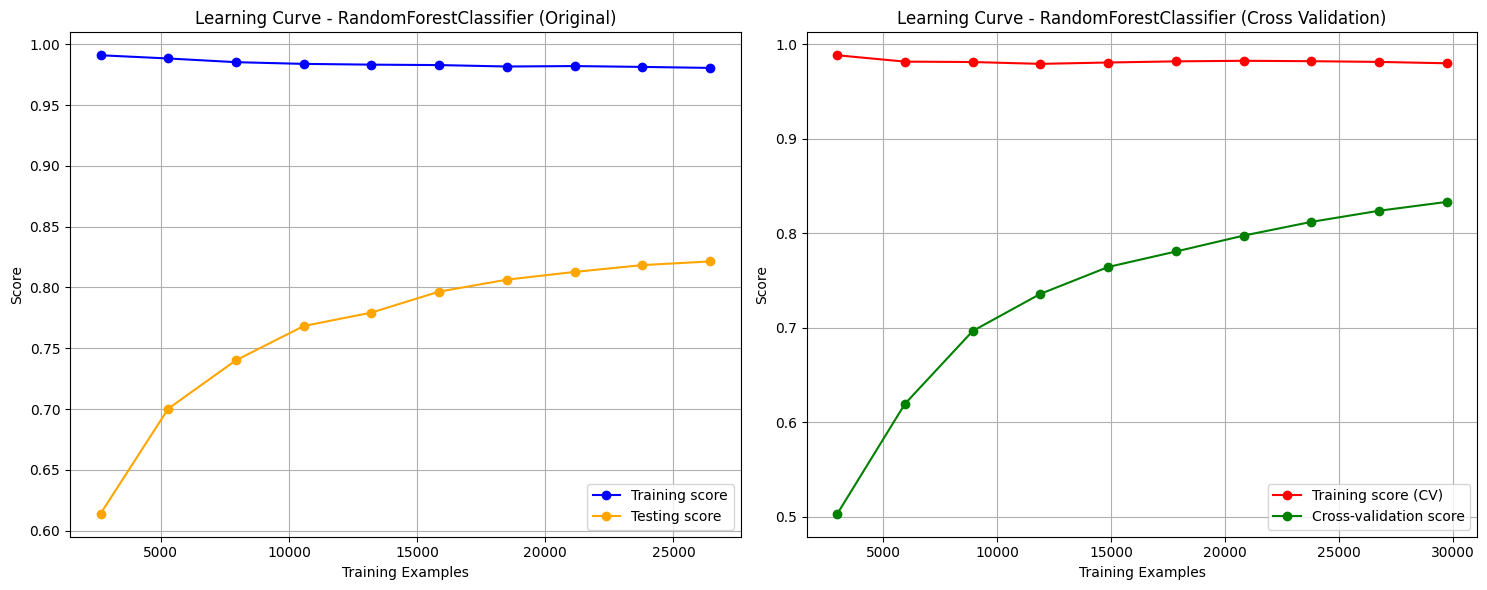

In [ ]:
plot_learning_curves_per_model(rf, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Decision Tree Multilabel Classifier**

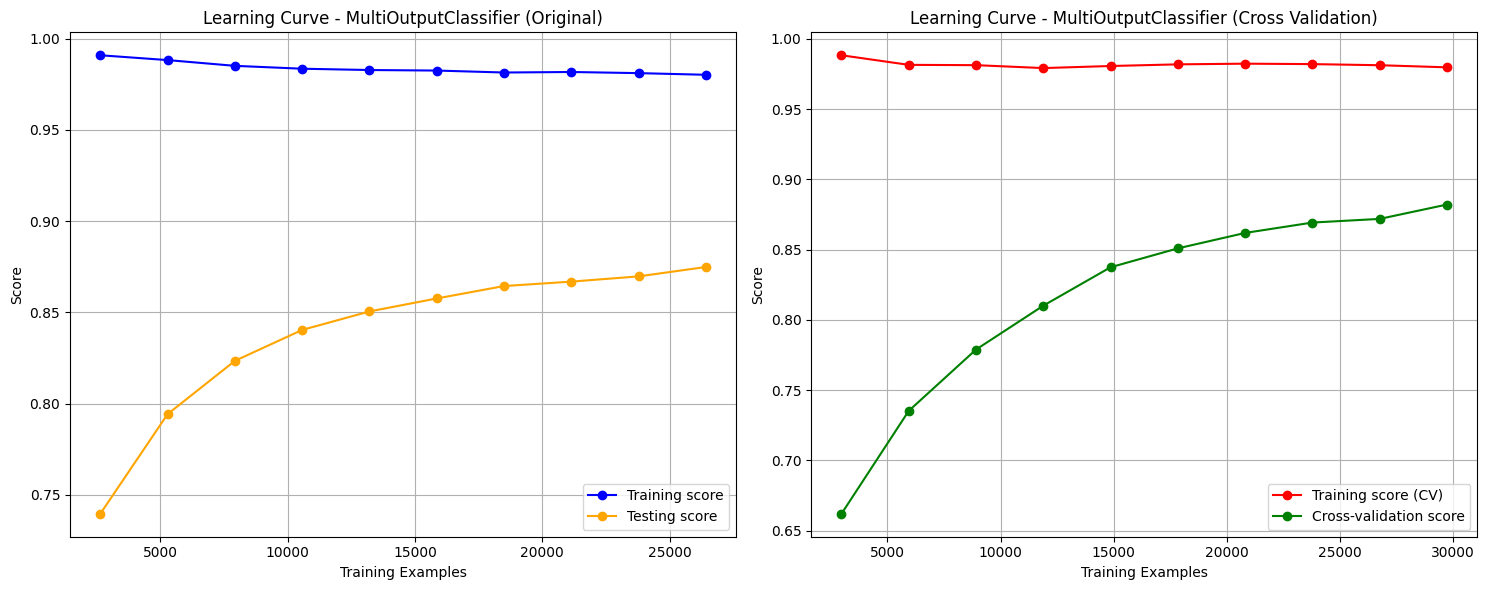

In [ ]:
plot_learning_curves_per_model(mldt_clf, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **K-Nearest Neighbors Multilabel**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  

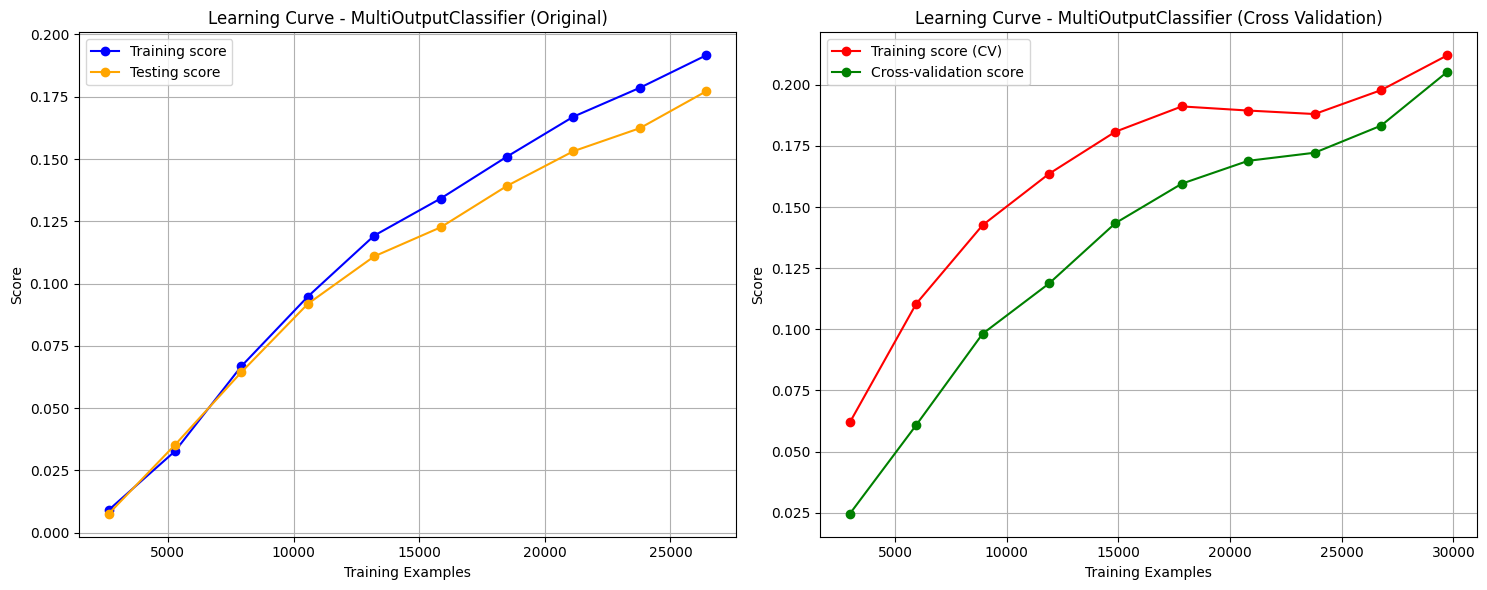

In [ ]:
plot_learning_curves_per_model(multioutput_knn, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Support Vector Machine Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


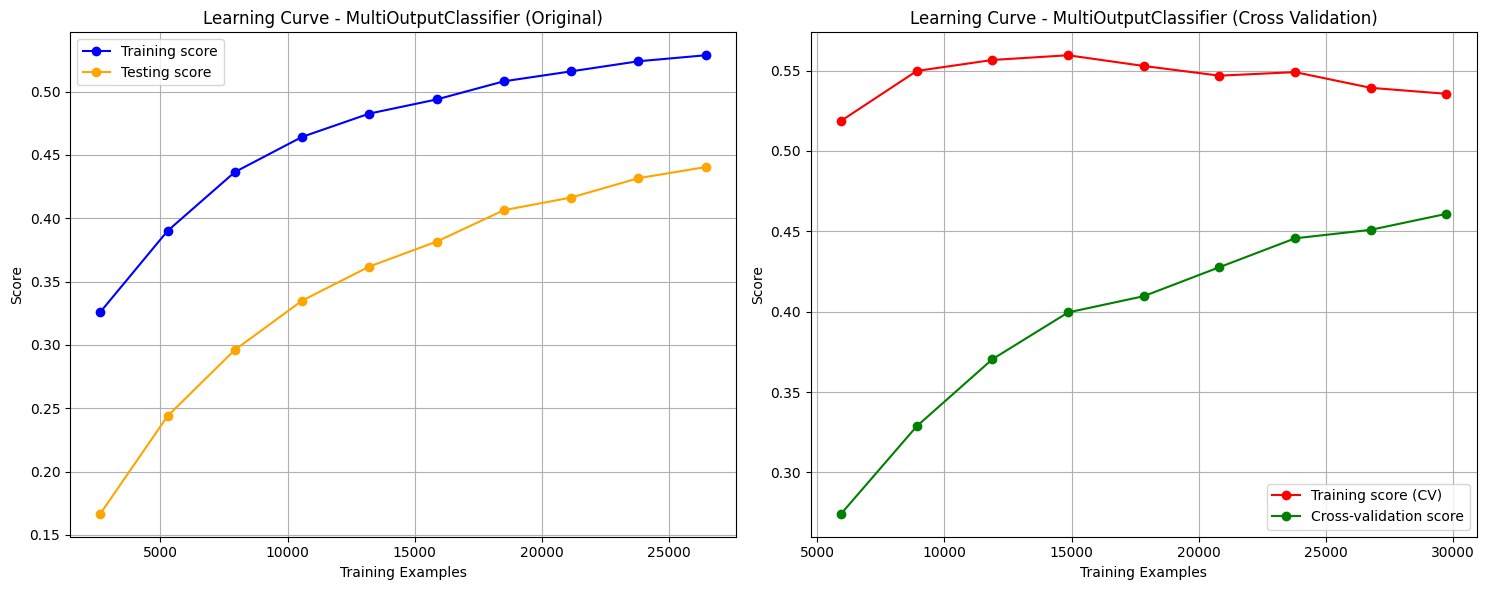

In [ ]:
plot_learning_curves_per_model(multioutput_svc, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Logistic Regression Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

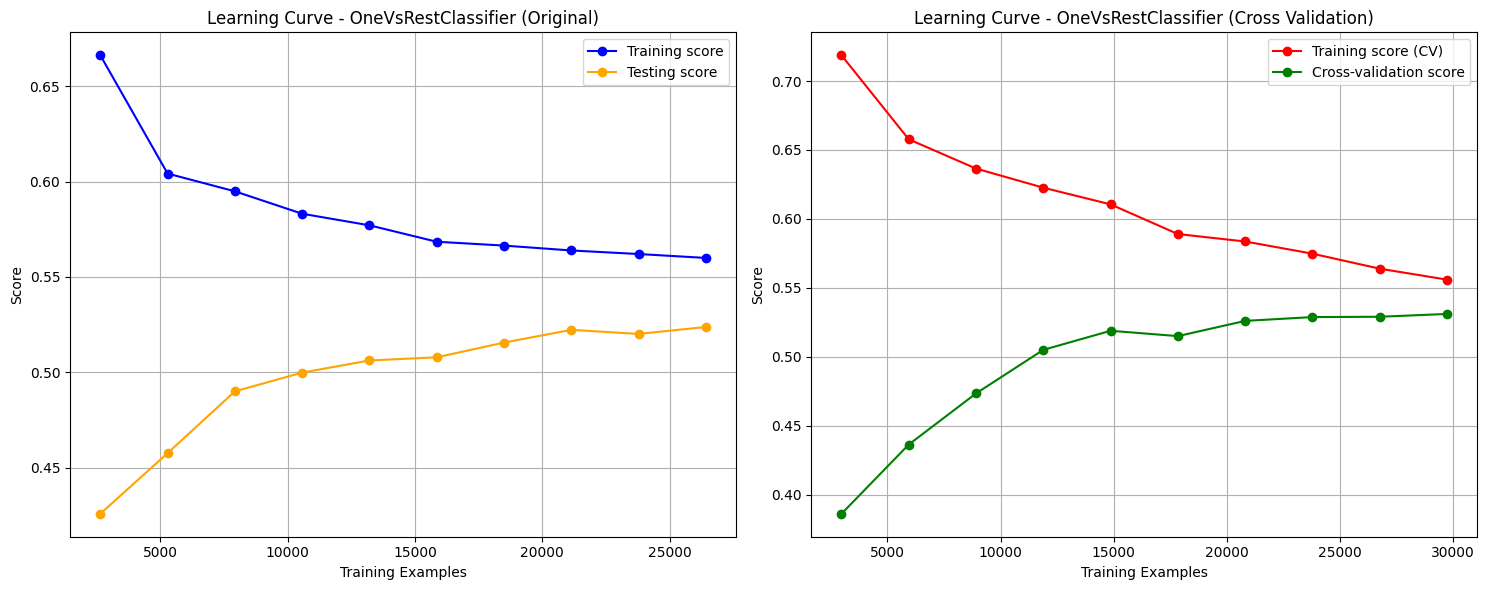

In [ ]:
plot_learning_curves_per_model(lr, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Gaussian Naive Bayes Multilabel Classifier**

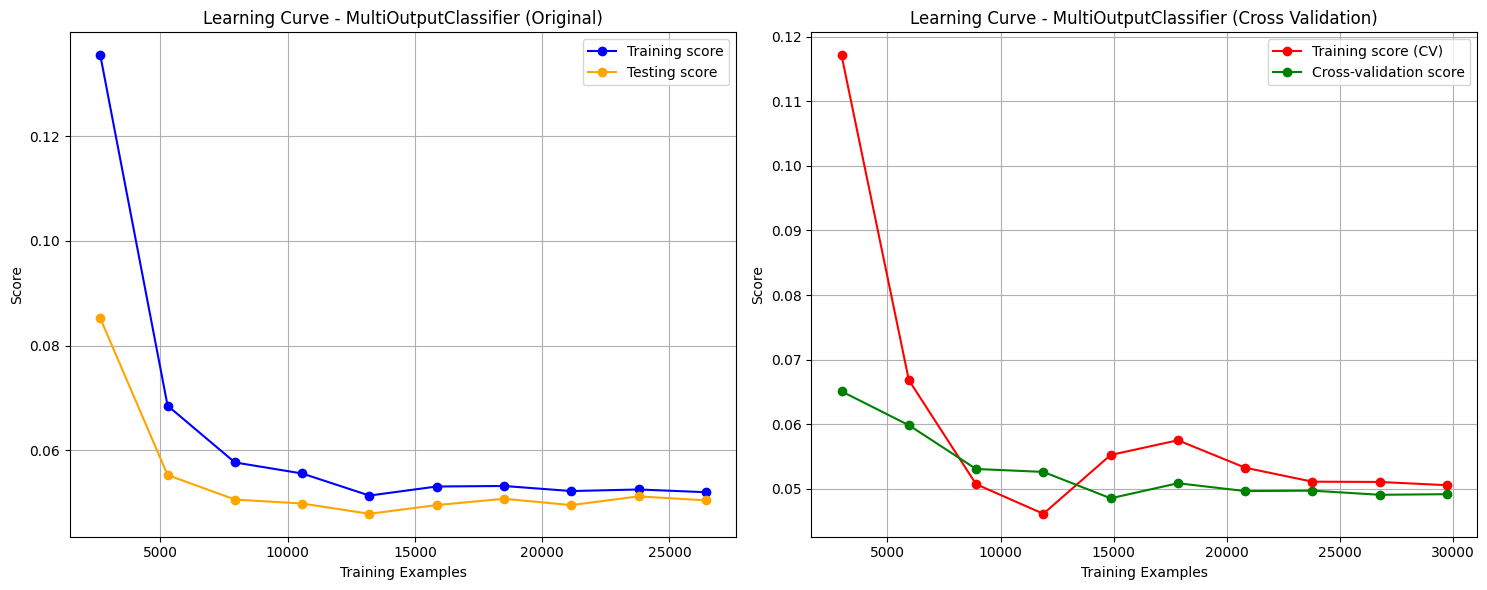

In [ ]:
plot_learning_curves_per_model(multi_target_nb, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Extreme Gradient Boosting Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


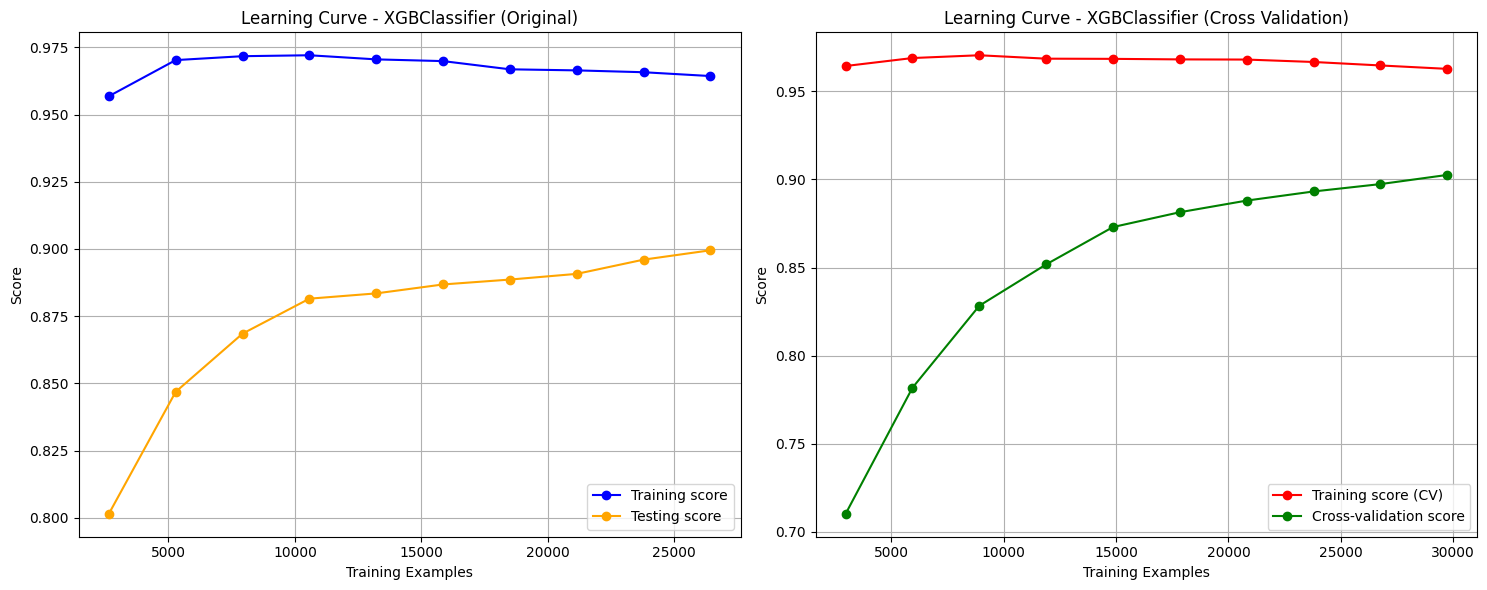

In [ ]:
plot_learning_curves_per_model(xgb, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Adaptive Boosting Multilabel Classifier**

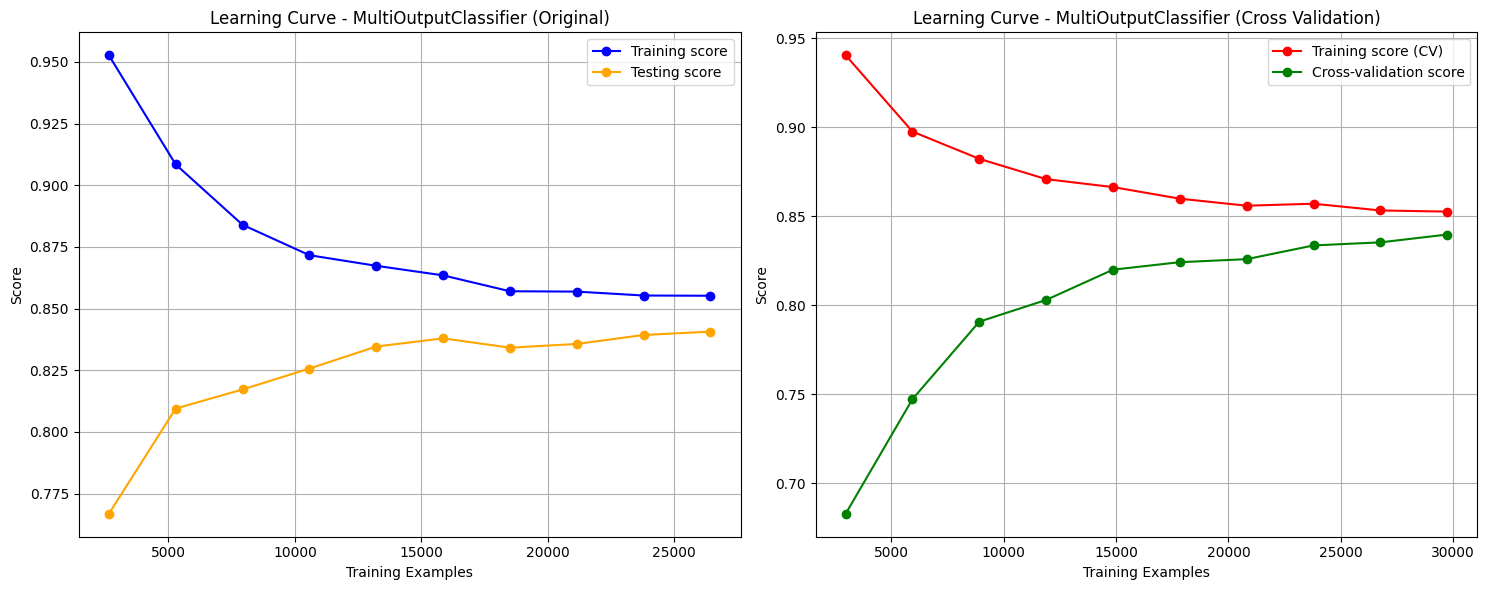

In [ ]:
plot_learning_curves_per_model(multilabel_adaboost_clf, X, y, X_train, y_train, X_test, y_test, cv=kfold)

#### **Neural Network Multilabel Classifier** (Model Fit)

In [ ]:
# Tentukan jumlah epoch dari history model
num_epochs = 50

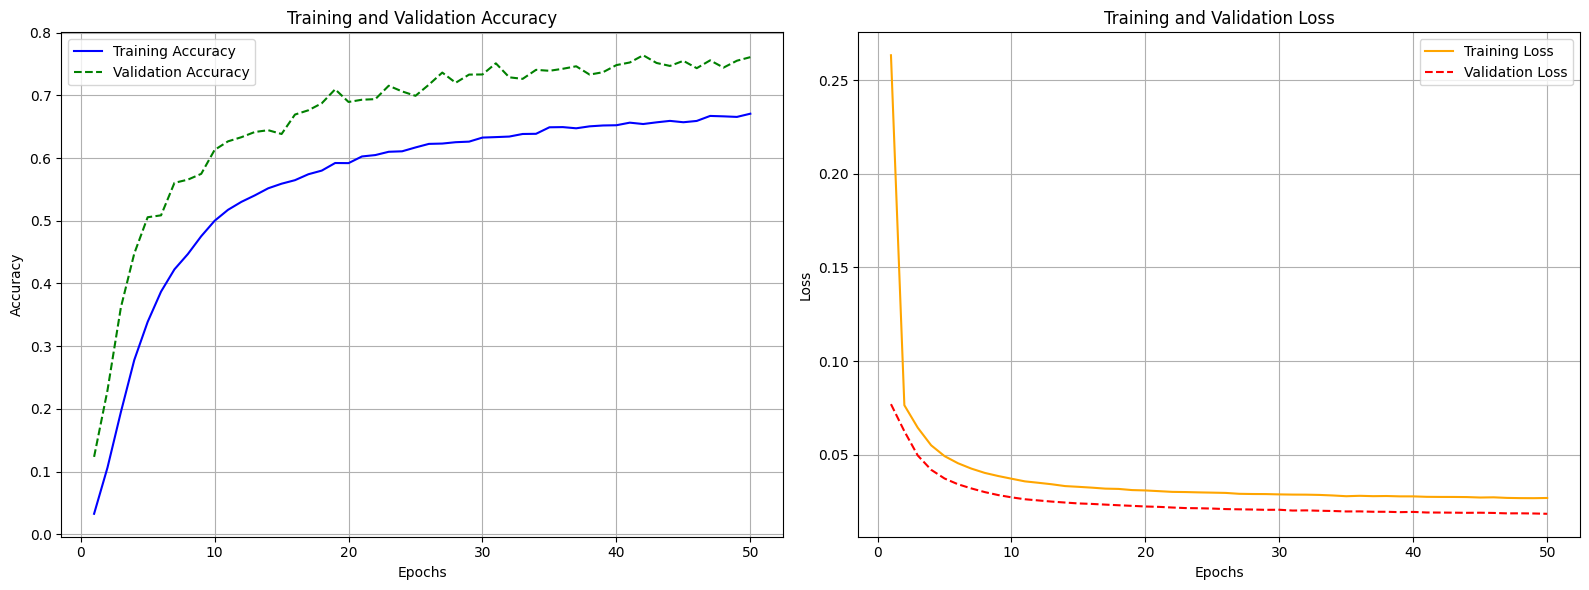

In [ ]:
plot_learning_curveNn(history, num_epochs)

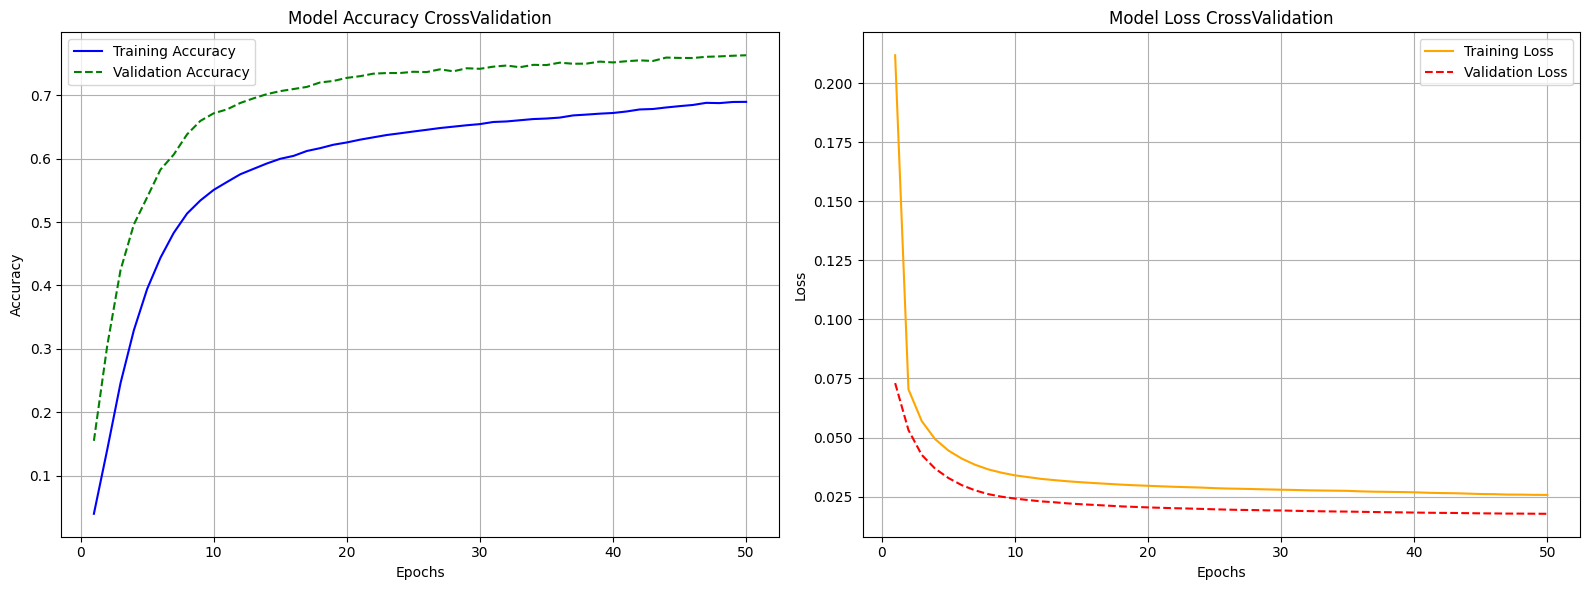

In [ ]:
# Plot learning curve
plot_learning_curveCVNn(histories, num_epochs)

## **Model Comparison**

### **Split Data**

In [ ]:
df_test = pd.concat([dfRf_Ts,dfDt_Ts,dfKnn_Ts,dfSvc_Ts,dfLr_Ts,dfNb_Ts,dfXGB_Ts,dfADB_Ts,dfNn_Ts], ignore_index=True)
df_test.sort_values(by='Accuracy (Test)', ascending=False)

Model Accuracy (Test) Precision (Test) Recall (Test)  \
6                    XGBoost         0.89952          0.96082       0.91513   
1              Decision Tree         0.87485          0.92167       0.91625   
7                   AdaBoost         0.84065          0.95185       0.85777   
0              Random Forest         0.82143          0.95764       0.81857   
8             Neural Network         0.57461          0.76593       0.62103   
4        Logistic Regression         0.52376          0.74668       0.59459   
3  Support Vector Classifier         0.44038          0.82126       0.47821   
2        K-Nearest Neighbors         0.17721          0.60014       0.18308   
5                Naive Bayes         0.05039          0.30312       0.96052   

  F1 Score (Test)  
6         0.93653  
1         0.91837  
7         0.89877  
0         0.87866  
8         0.64604  
4         0.63689  
3         0.55520  
2         0.25518  
5         0.41935

### **Cross Validation**

In [ ]:
df_val = pd.concat([dfRf_Valcv,dfDt_Valcv,dfKnn_Valcv,dfSvc_Valcv,dfLr_Valcv,dfGnb_Valcv,dfXGB_Valcv,dfADB_Valcv,dfNn_Valcv], ignore_index=True)
df_val.sort_values(by='Accuracy (Val)', ascending=False)

Model Accuracy (Val) Precision (Val) Recall (Val)  \
6                    XGBoost        0.90268         0.96183      0.91775   
1              Decision Tree        0.88210         0.92108      0.91858   
7                   AdaBoost        0.83978         0.94952      0.85735   
0              Random Forest        0.83309         0.95947      0.82849   
8                  NeuralNet        0.60059         0.86576      0.62783   
4        Logistic Regression        0.53109         0.74306      0.60061   
3  Support Vector Classifier        0.46086         0.81714      0.49612   
2        K-Nearest Neighbors        0.20535         0.65390      0.20876   
5                Naive Bayes        0.04916         0.30239      0.95680   

  F1 Score (Val)  
6        0.93814  
1        0.91895  
7        0.89695  
0        0.88562  
8        0.72771  
4        0.64245  
3        0.56723  
2        0.28990  
5        0.41828